# Capstone Project

**Name : Pari Pandey**

**ASU ID: 1225078387**

**Dataset:** Cancer Patient Data

https://www.kaggle.com/datasets/ak0212/china-cancer-patient-records

### **Milestone 1: Data Preparation Report**

**Tasks for Milestone 1:** 
- Exploratory Data Analysis (EDA)
- Data Cleaning
- Feature Engineering
- Report Preparation

In [32]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Exploratory Data Analysis (EDA)

In [34]:
# Load the dataset
file_path = 'china_cancer_patients_synthetic.csv'
df = pd.read_csv(file_path)

# Shape of the dataset
print('Shape of dataset:', df.shape)

# Display the first few rows of the dataset
df.head()

Shape of dataset: (10000, 20)


,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN


In [35]:
# Display information about the dataset
print("INFO:")
df.info()

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMonths

In [36]:
# Display summary statistics of the dataset
print("\nDESCRIPTIVE STATISTICS:")
df.describe().T


DESCRIPTIVE STATISTICS:


,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.60020,19.705608,18.0,35.0,51.0,69.0,85.0
TumorSize,10000.0,6.33904,2.234999,0.5,4.8,6.4,7.9,14.2
ChemotherapySessions,10000.0,3.99900,6.203600,0.0,0.0,0.0,8.0,20.0
RadiationSessions,10000.0,3.04640,7.301505,0.0,0.0,0.0,0.0,30.0
FollowUpMonths,10000.0,30.43280,17.162545,1.0,16.0,31.0,45.0,60.0


In [37]:
# Separate the numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical features:', numerical_features)

Numerical features: ['Age', 'TumorSize', 'ChemotherapySessions', 'RadiationSessions', 'FollowUpMonths']


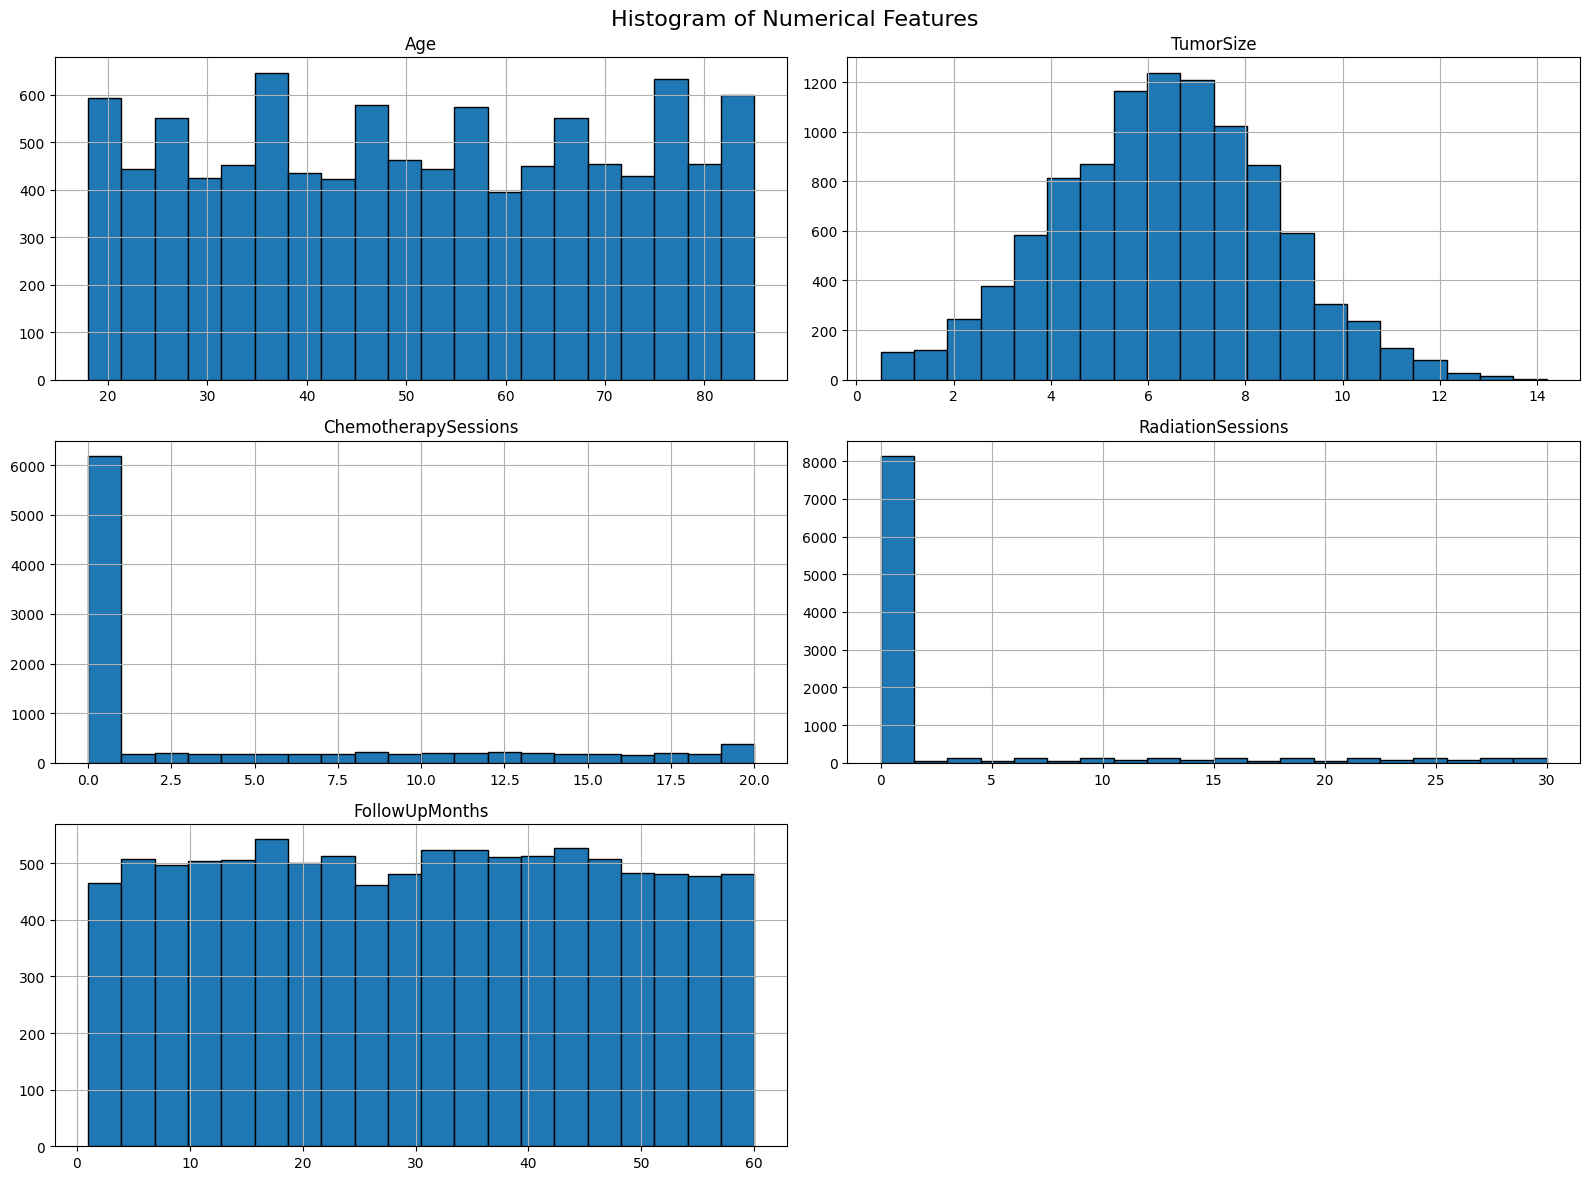

In [38]:
# Histograms for numerical features
df[numerical_features].hist(figsize=(16,12), bins=20, edgecolor='black')
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

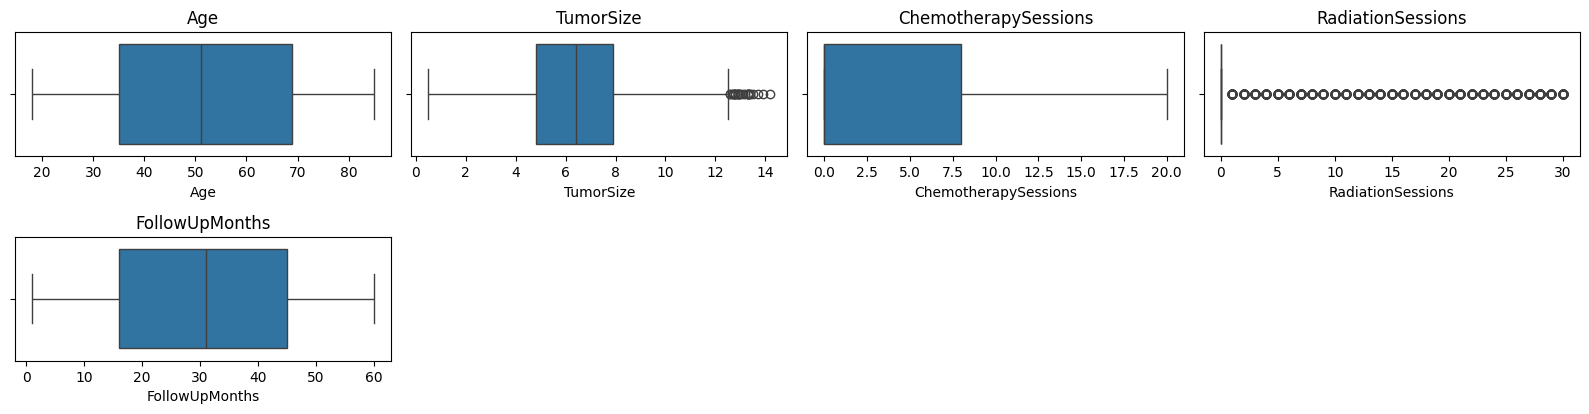

In [39]:
# Box plots for numerical features
plt.figure(figsize=(16,12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

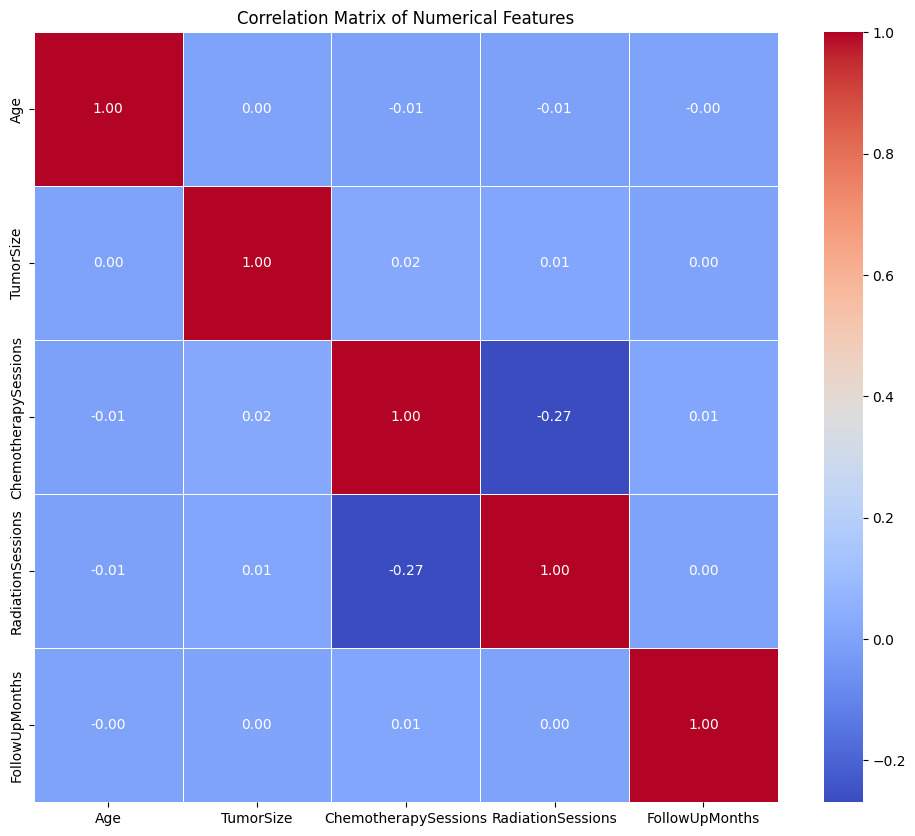

In [40]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=12)
plt.show()

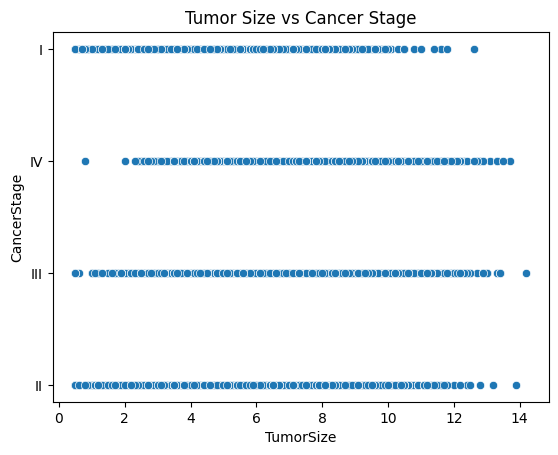

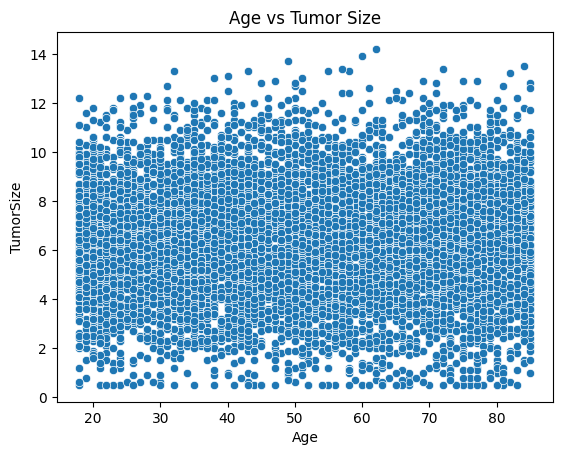

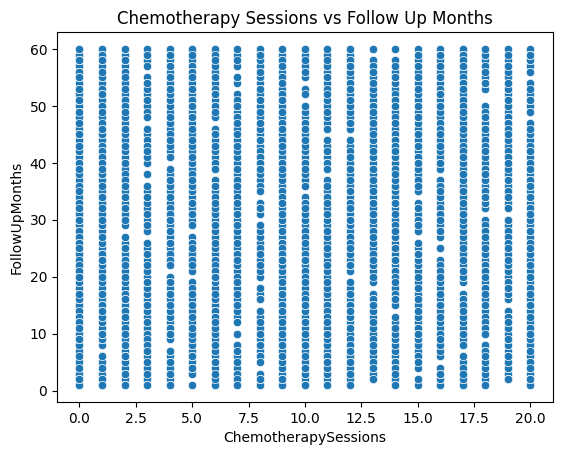

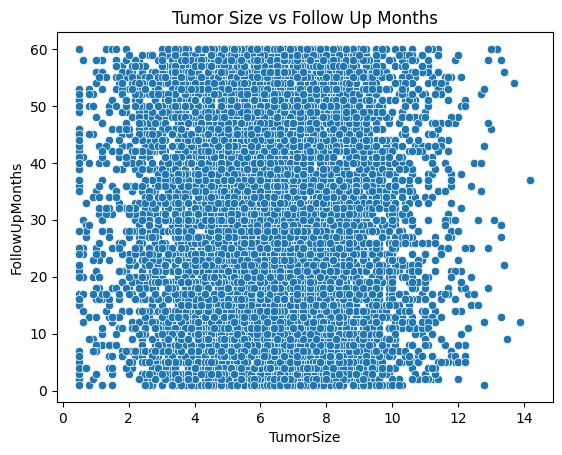

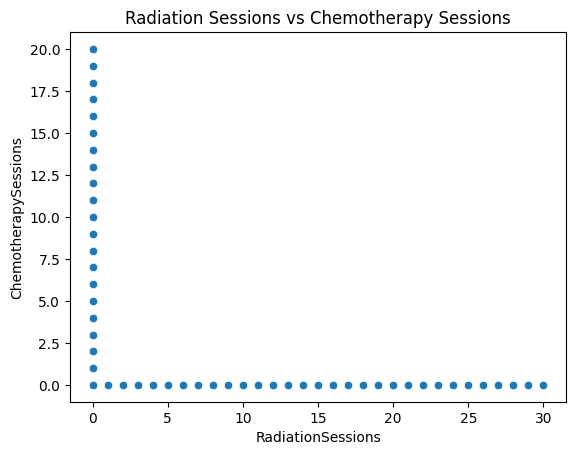

In [41]:
# Scatter plots for pairs of numerical features

# TumorSize vs Cancer Stage
sns.scatterplot(x=df["TumorSize"], y=df["CancerStage"])
plt.title("Tumor Size vs Cancer Stage")
plt.show()

# Age vs TumorSize
sns.scatterplot(x=df["Age"], y=df["TumorSize"])
plt.title("Age vs Tumor Size")
plt.show()

# ChemotherapySessions vs. FollowUpMonths
sns.scatterplot(x=df["ChemotherapySessions"], y=df["FollowUpMonths"])
plt.title("Chemotherapy Sessions vs Follow Up Months")
plt.show()

# TumorSize vs FollowUpMonths
sns.scatterplot(x=df["TumorSize"], y=df["FollowUpMonths"])
plt.title("Tumor Size vs Follow Up Months")
plt.show()

# RadiationSessions vs ChemotherapySessions
sns.scatterplot(x=df["RadiationSessions"], y=df["ChemotherapySessions"])
plt.title("Radiation Sessions vs Chemotherapy Sessions")
plt.show()

In [42]:
# Outlier detection using IQR method
outlier_summary = {}

for col in numerical_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)][col].count()
    outlier_summary[col] = int(outliers)

outlier_summary

{'Age': 0,
 'TumorSize': 27,
 'ChemotherapySessions': 0,
 'RadiationSessions': 1926,
 'FollowUpMonths': 0}

### 2. Data Cleaning

In [43]:
# Create a copy of the original dataset for cleaning
df_clean = df.copy()

In [44]:
# Identify missing values in the dataset
missing_values = df_clean.isnull().sum()
print('Missing values in each column before cleaning:\n', missing_values)

Missing values in each column before cleaning:
 PatientID                  0
Gender                     0
Age                        0
Province                   0
Ethnicity                  0
TumorType                  0
CancerStage                0
DiagnosisDate              0
TumorSize                  0
Metastasis                 0
TreatmentType              0
SurgeryDate             5673
ChemotherapySessions       0
RadiationSessions          0
SurvivalStatus             0
FollowUpMonths             0
SmokingStatus              0
AlcoholUse              5921
GeneticMutation         7200
Comorbidities           3715
dtype: int64


In [45]:
# Handle missing data
df_clean["AlcoholUse"] = df_clean["AlcoholUse"].fillna("Unknown")
df_clean["GeneticMutation"] = df_clean["GeneticMutation"].fillna("Not Tested")
df_clean["Comorbidities"] = df_clean["Comorbidities"].fillna("None Reported")

print("Missing categorical data was handled.")

Missing categorical data was handled.


In [46]:
# Standardize data formats
df_clean['DiagnosisDate'] = pd.to_datetime(df_clean['DiagnosisDate'], errors='coerce')
df_clean["SurgeryDate"] = pd.to_datetime(df_clean["SurgeryDate"], errors="coerce")


In [47]:
# Handle missing data
df_clean['SurgeryDate'] = df_clean['SurgeryDate'].fillna(df_clean['DiagnosisDate'])
df_clean[['DiagnosisDate','SurgeryDate']].head()
df_clean.isnull().sum()

PatientID               0
Gender                  0
Age                     0
Province                0
Ethnicity               0
TumorType               0
CancerStage             0
DiagnosisDate           0
TumorSize               0
Metastasis              0
TreatmentType           0
SurgeryDate             0
ChemotherapySessions    0
RadiationSessions       0
SurvivalStatus          0
FollowUpMonths          0
SmokingStatus           0
AlcoholUse              0
GeneticMutation         0
Comorbidities           0
dtype: int64

In [48]:
# Standardize data formats

# Convert categorical data
categorical_to_category = [
    "Gender", "Province", "Ethnicity", "TumorType",
    "CancerStage", "Metastasis", "TreatmentType",
    "SurvivalStatus", "SmokingStatus", "AlcoholUse",
    "GeneticMutation"
]
for col in categorical_to_category:
    df_clean[col] = df_clean[col].astype("category")

# Convert Metastasis to binary data
df_clean["Metastasis_binary"] = df_clean["Metastasis"].map({"No": 0, "Yes": 1}).astype(int)

# Adding ordering to different cancer stages for later use
stage_order = ["I", "II", "III", "IV"]
df_clean["CancerStage"] = pd.Categorical(df_clean["CancerStage"], categories=stage_order, ordered=True)

In [49]:
# Remove outliers identified in the EDA
outlier_categories = ["Age", "TumorSize",
                        "ChemotherapySessions",
                        "RadiationSessions",
                        "FollowUpMonths"]

def remove_outliers(data, cols):
    cleaned = data.copy()
    for col in cols:
        q1 = cleaned[col].quantile(0.25)
        q3 = cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        cleaned = cleaned[(cleaned[col] >= lower_bound) & (cleaned[col] <= upper_bound)]
    return cleaned

print("Shape before outlier removal:", df_clean.shape)
df_no_outliers = remove_outliers(df_clean, outlier_categories)
print("Shape after outlier removal:", df_no_outliers.shape)


Shape before outlier removal: (10000, 21)
Shape after outlier removal: (8049, 21)


In [50]:
# Data after data cleaning
df_final = df_no_outliers.copy()

#### **Missing Values:**

Several columns in the dataset contained missing values
- **SurgeryDate (5673)**
- **AlcoholUse (5921)**
- **GeneticMutation (7200)**
- **Comorbidities (3715)**

Because this dataset represents clinical information, I used imputation:
- **SurgeryDate:** Missing values indicate patients who did not undergo surgery, but instead of creating a new binary data explaining who had surgery and who didn't, I replaced it with the DiagnosisDate.

- **AlcoholUse:** Imputed as “Unknown” since missing values indicates non-recorded history.

- **GeneticMutation:** Imputed as “Not Tested” because some people may have chosen to skip the mutation testing.

- **Comorbidities:** Imputed with “None Reported,” meaning no comorbidity documentation was available.

This preserves clinical meaning and avoids introducing bias.

#### **Standardize Data Formats:**
I converted DiagnosisDate and SurgeryDate to datetime objects so I can later be used in time-based formats. I also converted key variables such as Gender, TumorType, CancerStage, Metastasis, SmokingStatus, and AlcoholUse to categorical data type, and created a binary Metastasis_binary feature for convenient use in the future.

#### **Outliers:**
I used the IQR rule on Age, TumorSize, ChemotherapySessions, RadiationSessions, and FollowUpMonths to identify and remove extreme outliers. Before and after removal of such values were compared to understand how many records were affected. 'df_final' is the cleaned dataset for future modeling.

### 3. Feature Engineering

In [51]:
# Create new features

# Extracting month and year from diagnosis date
df_final["DiagnosisYear"] = df_final["DiagnosisDate"].dt.year
df_final["DiagnosisMonth"] = df_final["DiagnosisDate"].dt.month

# Number of days till surgery
df_final["TimeToSurgery"] = (df_final["SurgeryDate"] - df_final["DiagnosisDate"]).dt.days

# Convert age groups into categories
df_final["AgeGroup"] = pd.cut(
    df_final["Age"],
    bins=[0, 30, 50, 70, 120],
    labels=["Young", "Middle-Aged", "Senior", "Elderly"]
)

# Adding a risk score to showcase the burden the cancer has brought
df_final["RiskScore"] = (
    df_final["TumorSize"]
    + df_final["ChemotherapySessions"] * 0.5
    + df_final["RadiationSessions"] * 0.5
    + df_final["Metastasis_binary"] * 5
)


In [52]:
# Transform categorical variables into numerical ones
df_encoded = pd.get_dummies(df_final, columns=categorical_to_category)
df_encoded.head()

,PatientID,Age,DiagnosisDate,TumorSize,SurgeryDate,ChemotherapySessions,RadiationSessions,FollowUpMonths,Comorbidities,Metastasis_binary,...,SmokingStatus_Current,SmokingStatus_Former,SmokingStatus_Never,AlcoholUse_Heavy,AlcoholUse_Occasional,AlcoholUse_Unknown,GeneticMutation_BRCA1,GeneticMutation_EGFR,GeneticMutation_KRAS,GeneticMutation_Not Tested
1,CHN-00002,66,2015-01-03,9.5,2015-03-24,11,0,57,"Hepatitis B, Hypertension",1,...,False,False,True,False,True,False,False,True,False,False
2,CHN-00003,26,2022-03-26,9.3,2022-07-14,0,0,40,None Reported,1,...,False,True,False,False,False,True,False,False,False,True
3,CHN-00004,35,2019-06-19,7.7,2019-08-27,0,0,45,None Reported,0,...,False,False,True,False,True,False,False,False,True,False
4,CHN-00005,32,2012-02-07,7.3,2012-02-07,4,0,42,None Reported,0,...,False,False,True,False,False,True,False,False,False,True
5,CHN-00006,40,2021-05-02,4.2,2021-05-02,2,0,37,None Reported,0,...,True,False,False,False,True,False,False,False,True,False


In [53]:
# Standardize numerical features if necessary
numeric_categories = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numeric_categories.remove("Metastasis_binary")
numeric_categories.remove("DiagnosisYear")
numeric_categories.remove("DiagnosisMonth")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numeric_categories] = scaler.fit_transform(df_encoded[numeric_categories])


In [54]:
# Final data for modelling
df_final = df_encoded.copy()
df_final.head()

,PatientID,Age,DiagnosisDate,TumorSize,SurgeryDate,ChemotherapySessions,RadiationSessions,FollowUpMonths,Comorbidities,Metastasis_binary,...,SmokingStatus_Current,SmokingStatus_Former,SmokingStatus_Never,AlcoholUse_Heavy,AlcoholUse_Occasional,AlcoholUse_Unknown,GeneticMutation_BRCA1,GeneticMutation_EGFR,GeneticMutation_KRAS,GeneticMutation_Not Tested
1,CHN-00002,0.727997,2015-01-03,1.450683,2015-03-24,0.925036,0.0,1.551288,"Hepatitis B, Hypertension",1,...,False,False,True,False,True,False,False,True,False,False
2,CHN-00003,-1.298108,2022-03-26,1.359684,2022-07-14,-0.755172,0.0,0.560075,None Reported,1,...,False,True,False,False,False,True,False,False,False,True
3,CHN-00004,-0.842234,2019-06-19,0.631691,2019-08-27,-0.755172,0.0,0.851608,None Reported,0,...,False,False,True,False,True,False,False,False,True,False
4,CHN-00005,-0.994192,2012-02-07,0.449693,2012-02-07,-0.144188,0.0,0.676688,None Reported,0,...,False,False,True,False,False,True,False,False,False,True
5,CHN-00006,-0.588971,2021-05-02,-0.960793,2021-05-02,-0.449680,0.0,0.385155,None Reported,0,...,True,False,False,False,True,False,False,False,True,False


#### **New Features**
Several new features were created to enhance the model:
- DiagnosisYear & DiagnosisMonth were extracted from the DiagnosisDate to capture the year and months and visualise a trend in these in the future.
- TimeToSurgery represents the time between a diagnosis being made and a surgery being done. This is useful data for disease severity and urgency.
- AgeGroup categorizes age into relevant bins (Young, Middle-Aged, Senior, Elderly) to model non-linear age effects.
- ComorbidityCount converts the comorbidity list into a numerical count. This reflects patient health and its complexity.
- RiskScore is a an index combining tumor size, treatment intensity, and metastasis status to quantify overall burden the disease has on someone.
- Metastasis_binary is a simplified version of Metastasis that makes use of numeric velues for easy use in ML models.

#### **Transform Categorical Variables**
All categorical variables were transformed using one-hot encoding to ensure compatibility with machine learning algorithms.

#### **Standardize Numerical Features**
Numerical features were standardized using StandardScaler to normalize variances, which is important for distance-based models and neural networks. These engineered and transformed features will be used in Milestone 2 to train and evaluate machine learning models.

### 4. Report
In this Milestone I prepared the cancer patient dataset for machine learning modeling. I began by loading and inspecting the dataset to understand its structure, data types, etc. I performed a thorough EDA which included examining distributions, relationships between variables, correlations, and outliers.
Next, I completed data cleaning by addressing missing values in SurgeryDate, AlcoholUse, GeneticMutation, and Comorbidities using appropriate imputation strategies. 
I then standardized date formats, converted important variables into categorical types, and ensured numerical columns were ready for modeling. I also checked for outliers and removed outliers using IQR on important numeric variables.
Finally, I engineered several new features which include DiagnosisYear, DiagnosisMonth, TimeToSurgery, AgeGroup, ComorbidityCount, and RiskScore, which was followed by transforming categorical variables using one-hot encoding. Numerical features were standardized to prepare for model development.
This final dataset is now ready for Milestone 2.


In this Milestone I completed all steps required to prepare the cancer patient dataset for machine learning analysis. I began with an EDA, where I inspected the dataset structure, explored numerical feature distributions using histograms and boxplots, examined relationships between key variables through scatter plots and generated a correlation matrix to identify potential patterns. I used important features for the scatterplots to highlight the features that can prove to be very useful in this study. I also identified outliers in several numeric columns using visual inspection(box plots) and IQR-based methods that involve using the lower and upper fence values to find outliers.
For Data Cleaning, I handled missing values in multiple columns, including SurgeryDate, AlcoholUse, GeneticMutation, and Comorbidities. SurgeryDate was imputed using DiagnosisDate to maintain consistency in the timeline, while the other columns were imputed using appropriate categories such as “Unknown,” “Not Tested,” and “None Reported” for AlcoholUse, GeneticMutation, and Comorbidities respectively. I standardized date formats, ensured categorical variables were properly encoded and removed outliers using the IQR method.
In the Feature Engineering stage, I created new variables such as DiagnosisYear, DiagnosisMonth, TimeToSurgery, AgeGroup, ComorbidityCount, and RiskScore, which can be very useful in this study as it provides a comprehensive understanding of how certain factors can affect the burden this disease causes. I transformed categorical variables into numerical form using one-hot encoding and standardized the numerical features to prepare them for modeling in later milestones.
All analyses, transformations, and visualizations were compiled into a this Jupyter Notebook containing markdown explanations and commentary for better clarity and understanding. The dataset is now fully cleaned, engineered, and ready for Milestone 2.

==============================================================================================================================================================================================================================
### **Milestone 2: Model Development Report**

**Tasks for Milestone 2:** 
- Model Selection
- Model Training
- Model Evaluation
- Code Quality Review
- Report Preparation

### 1. Model Selection

The goal of this project is to predict survival outcome (Alive vs. Deceased) for cancer patients using clinical and demographic features. Because the target variable is binary, this is a supervised classification problem. The dataset is imbalanced with a majority of the patients being labeled as Alive while a smaller proportion being labeled as Deceased. This makes evaluation beyond simple accuracy especially important. Looking at the above I selected the following models:

#### 1. Logistic Regression
Logistic Regression is a used for binary classification and works well with one-hot encoded, tabular data like the above dataset. The coefficients produced can be related back to risk factors.

**Strengths for this dataset:**
Handles high-dimensional one-hot encoded features reasonably well.
Outputs coefficients produced can be related back to risk factors.
Provides a standard baseline to compare more complex models against.

**Weaknesses for this dataset:**
The model assumes a mostly linear relationship between features and survival, which may be too simple for more complex learning.
Model can struggle when the true decision boundary is highly non-linear or when there are strong interactions between variables.

#### 2. Random Forest Classifier
Random Forests are powerful for tabular clinical data, as they naturally model non-linear relationships and feature interactions.

**Strengths for this dataset:**
Handles mixed-scale numeric features and one-hot encoded categorical features without the need for feature scaling.
Robust to outliers and noise, and less prone to overfitting than a single decision tree.
Provides feature importance scores. This is useful for understanding which variables contribute most to the survival prediction.

**Weaknesses for this dataset:**
Less interpretable than LR, individual tree decisions can become complex to understand.
Requires hyperparameter tuning to balance bias and variance.

#### 3. Gradient Boosting Classifier
Gradient Boosting often achieves strong performance on tabular datasets by sequentially correcting errors made by previous trees, making it suitable for capturing subtle patterns especially in clinical data.

**Strengths for this dataset:**
Can model complex, non-linear relationships between features and survival outcome.
Often achieves high predictive accuracy on tabular data.

**Weaknesses for this dataset:**
More sensitive to hyperparameters and learning rate, which can cause overfitting of data, especially on imbalanced data.
Less interpretable than Random Forest, and training is more computationally expensive.

### 2. Model Training

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
# Cleaning the data and preparing it for modeling

# Create a copy of the final dataframe for modeling
model_df = df_final.copy()

# Drop columns that are not useful for modeling, such as identifiers and dates, that can also cause data issues
cols_to_drop = [
    "PatientID",
    "DiagnosisDate",
    "SurgeryDate",
    "Comorbidities",
    "AgeGroup"
]
model_df = model_df.drop(columns=cols_to_drop)

# Define target (Alive = 1, Deceased = 0)
y = model_df["SurvivalStatus_Alive"].astype(int)
X = model_df.drop(columns=["SurvivalStatus_Alive", "SurvivalStatus_Deceased"])

# Convert booleans to float values(0 and 1) so all features are numeric and don't cause issues during modeling
X = X.astype(float)

# Dropping the zero-variance column "RadiationSessions" as it has no variance and is not useful for modeling
X = X.drop(columns=["RadiationSessions"])

In [57]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((6439, 58), (1610, 58))

In [58]:
# Logistic Regression pipeline - ensures that the data is scaled before fitting the model
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=3000))
])
lr_vals = {
    "logreg__C": [0.01, 0.1, 1.0]
}

# Cross-validation and training for Logistic Regression
lr_grid_search = GridSearchCV(
    lr_pipeline,
    param_grid=lr_vals,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    error_score="raise"
)
lr_grid_search.fit(X_train, Y_train)

# Random Forest GridSearchCV
rf = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 4]
}

# Cross-validation and training for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="f1", n_jobs=-1)
rf_grid.fit(X_train, Y_train)

# Gradient Boosting GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3]
}

# Cross-validation and training for Gradient Boosting
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring="f1", n_jobs=-1)
gb_grid.fit(X_train, Y_train)


0.03s - Debugger warning: It seems that frozen modules are being used, which may
0.03s - Debugger warning: It seems that frozen modules are being used, which may
0.03s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.03s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging wil

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


### 3. Model Evaluation


Logistic Regression
Accuracy : 0.7751552795031056
Precision: 0.8188920454545454
Recall   : 0.915079365079365
F1 Score : 0.8643178410794603
ROC AUC  : 0.8560612244897959

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.27      0.34       350
           1       0.82      0.92      0.86      1260

    accuracy                           0.78      1610
   macro avg       0.64      0.59      0.60      1610
weighted avg       0.74      0.78      0.75      1610



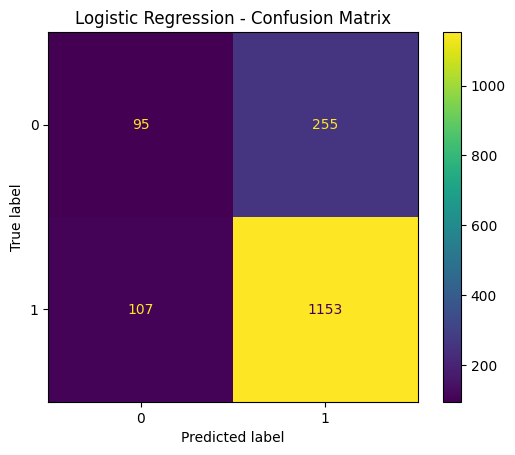

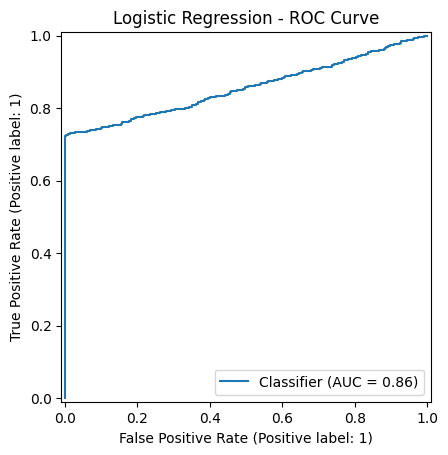


Random Forest
Accuracy : 0.7850931677018633
Precision: 0.7952196382428941
Recall   : 0.976984126984127
F1 Score : 0.8767806267806267
ROC AUC  : 0.8602925170068028

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.09      0.16       350
           1       0.80      0.98      0.88      1260

    accuracy                           0.79      1610
   macro avg       0.66      0.54      0.52      1610
weighted avg       0.74      0.79      0.72      1610



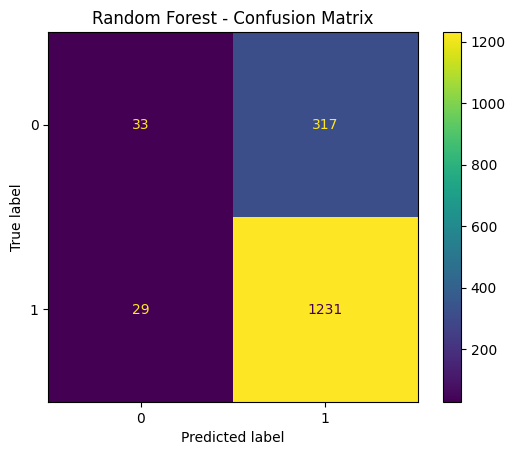

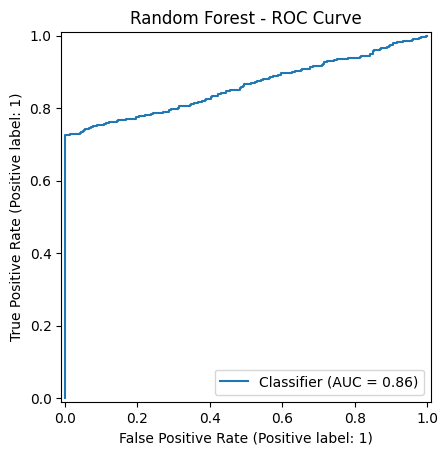


Gradient Boosting
Accuracy : 0.7832298136645963
Precision: 0.7830950901180858
Recall   : 1.0
F1 Score : 0.878354827466016
ROC AUC  : 0.8641938775510204

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       350
           1       0.78      1.00      0.88      1260

    accuracy                           0.78      1610
   macro avg       0.89      0.50      0.44      1610
weighted avg       0.83      0.78      0.69      1610



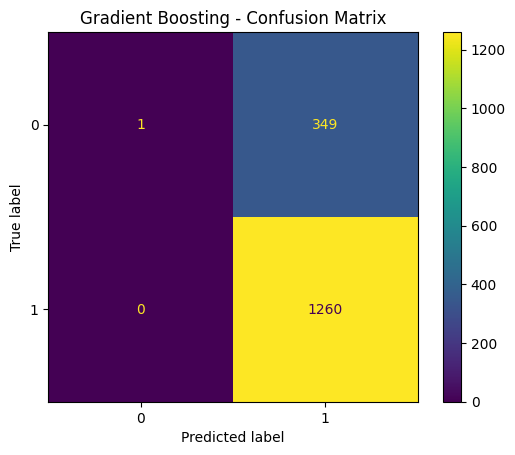

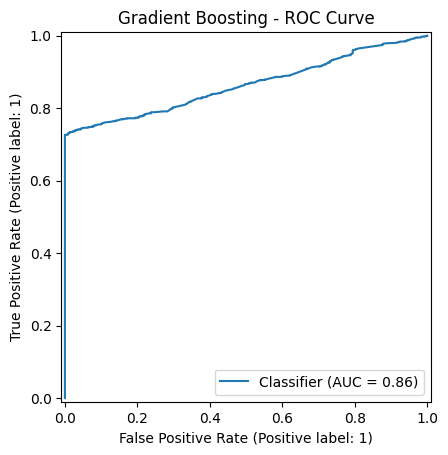

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.775155,0.818892,0.915079,0.864318,0.856061
1,Random Forest,0.785093,0.795220,0.976984,0.876781,0.860293
2,Gradient Boosting,0.783230,0.783095,1.000000,0.878355,0.864194


In [59]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay, classification_report
)
import matplotlib.pyplot as plt

# Function that evaluates model performance using ccuracy, precision,recall, F1-score for classification, RMSE, R² for regression
def evaluate_model(model_name, model):
    best_model = model.best_estimator_
    Y_pred = best_model.predict(X_test)
    Y_prob = best_model.predict_proba(X_test)[:, 1]

    print(f"\n{model_name}")
    print("Accuracy :", accuracy_score(Y_test, Y_pred))
    print("Precision:", precision_score(Y_test, Y_pred))
    print("Recall   :", recall_score(Y_test, Y_pred))
    print("F1 Score :", f1_score(Y_test, Y_pred))
    print("ROC AUC  :", roc_auc_score(Y_test, Y_prob)) # ROC AUC is used in healthcare related datasets to evaluate the performance of the model
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))

    # Confusion Matrix to compare the predicted and actual values
    cm = confusion_matrix(Y_test, Y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve to show sensitivity vs. false positive rates
    RocCurveDisplay.from_predictions(Y_test, Y_prob)
    plt.title(f"{model_name} - ROC Curve")
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1": f1_score(Y_test, Y_pred),
        "ROC AUC": roc_auc_score(Y_test, Y_prob)
    }

# Compare the performance of different models as a summary table
summary = []
summary.append(evaluate_model("Logistic Regression", lr_grid_search))
summary.append(evaluate_model("Random Forest", rf_grid))
summary.append(evaluate_model("Gradient Boosting", gb_grid))

summary_df = pd.DataFrame(summary)
summary_df


#### **Confusion matrices**
**Logistic Regression:**
Achieves a good balance between precision and recall, but misclassifies a noticeable number of deceased patients as alive.
The confusion matrix shows more errors in the Deceased class label, reflecting a class imbalance.

**Random Forest:**
Achieves the highest overall F1-score, with a very high recall for the Alive class and slightly improved handling of the Deceased class compared to LR.
Fewer false negatives for high-risk patients, which is very important when taking into account the medical context.

**Gradient Boosting:**
Shows perfect recall for the Alive class but almost completely fails to correctly classify the Deceased class, ends up predicting almost all cases as Alive.
This leads to strong aggregation but poor performance on the minority class, showcasing how a model can still work well while being biased.

### 4. Code Quality Review

In [60]:
print("Code has been cleaned, reviewed and comments have been added for easier understanding.")

Code has been cleaned, reviewed and comments have been added for easier understanding.


### 5. Report Preparation

Random Forest emerged as the best overall model, with the highest F1-score and strong ROC AUC, while providing better balance between sensitivity and precision compared to Gradient Boosting. 

Gradient Boosting achieved very high recall and high AUC, but ignored minority classes. This can cause issues when it comes to a medical especially healthcare setting and can cause risks.

Logistic Regression provided a strong, interpretable baseline. It performed well but slightly worse in comparison to the other methods in terms of F1 and AUC.

These results, combined with the visualizations of the confusion matrices and ROC curves, along with the comparisons table allowed me to conclude that Random Forest offers the most reliability while also balancing between performance and robustness. This is useful in this case of cancer survival prediction. Logistic Regression remains useful for interpretability and Gradient Boosting illustrates the risks of overfitting to the majority class in an imbalanced dataset.

==============================================================================================================================================================================================================================

### **Milestone 3: Final Project Report**

**Tasks for Milestone 3:** 
- Final Model Performance Analysis
- Deployment Plan
- Ethical Considerations
- Report Preparation

### 1. Final Model Performance Analysis

3 models were taken into consideration for this project. All these models were trained using GridSearchCV:

**1. Logistic Regression**

**2. Random Forest**

**3. Gradient Boosting**

The following is the performance summary for all 3 models:

In [61]:
summary_df = pd.DataFrame(summary)
summary_df

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.775155,0.818892,0.915079,0.864318,0.856061
1,Random Forest,0.785093,0.795220,0.976984,0.876781,0.860293
2,Gradient Boosting,0.783230,0.783095,1.000000,0.878355,0.864194


#### **Confusion Matrix Analysis**
**Logistic Regression:**
Achieves a good balance between precision and recall, but misclassifies a noticeable number of deceased patients as alive.
The confusion matrix shows more errors in the Deceased class label, reflecting a class imbalance. This can be problematic in medical settings with extreme repercussions.

**Random Forest:**
Achieves the highest overall F1-score, with a very high recall for the Alive class and slightly improved handling of the Deceased class compared to LR.
The model still struggles with minority class detection, which is very important when taking into account the medical context. It balances performance more effectively than LR or GB.

**Gradient Boosting:**
Shows perfect recall for the Alive class but almost completely fails to correctly classify the Deceased class, ends up predicting almost all cases as Alive.
This leads to strong aggregation but poor performance on the minority class, indicating severe bias toward the majority class and unacceptable clinical risk.

#### **ROC Curves**
All three models achieved similar AUC values (~0.86). This suggests that their probability outputs are reasonably calibrated.
However, ROC AUC alby itself cannot be completely reliable and can be misleading with imbalanced datasets.
- A high AUC doesn’t guarantee good performance on minority classes as can be seen in the summary.
- Confusion matrices shows us how gradient boosting is unusable in a practical setting despite its high AUC.

#### **Final Model**

**Random Forest**

Random Forest is selected as the final model. This is because of the following:
1. Had a good overall F1-score, the most balanced metric for imbalanced medical datasets.
2. Strong recall (0.977), meaning almost all Alive patients are correctly identified. This is especially important when making predictions about mortality.
3. Better minority class detection than Gradient Boosting.
4. Better interpretability through feature importance.

While logistic regression offered interpretability, it underperformed relative to Random Forest. Gradient boosting was rejected due to its extreme imbalance related bias towards the majority class.

**Limitations**

- The model is good at recognizing patients who survived, but struggles to detect those who did not, because it had far fewer examples to learn from.
- The model might be learning patterns. This means the model may do well on the test data now, but might not perform as well on new patient data in the future.
- It doesn’t track how a patient’s condition changes over time but only looks at the provided information from one point in time.
- Just because a feature is important for prediction doesn’t mean it directly affects the survival outcomes. Random Forest gives importance scores for features, but not all features have an effect on the outcome.

**Future Improvements**

- SMOTE (Synthetic Minority Over-sampling Technique) and ADASYN (Adaptive Synthetic Sampling) are popular oversampling methods for handling imbalanced datasets. These techniques can create additional examples of the minority class so the model can learn better from them and improve its predictions.
- Algorithms like XGBoost or LightGBM often perform very well on large, tabular datasets and can help find patterns that Random Forest missed and could give us better accuracy with the outcome.
- Instead of only predicting whether a patient survived, we can model how long they survived. This is more informative in a medical setting and can be useful in conducting further studies.
- Making use of information such as time from diagnosis to treatment and adding more time-based information would help the model make more realistic predictions.

### 2. Deployment Plan

#### **Detailed Deployment Architecture**
The following is a simple deployment architecture for the cancer survival prediction system:
- Accept patient data from clinical systems or manual entry
- Apply the same data cleaning and feature engineering steps used in the training process of the model
- Generate a survival prediction with an associated probability or risk score
- Log these predictions for monitoring, auditing, potential retraining, and future studies
- Utilise the model securely in a healthcare setting

**1. Data Handling**

Inputs to the system could be of the following form:
- Electronic Medical Record or the hospital database
- CSV files (batch input)
- Manually entering patient data through a form for each patient

This would be then followed by utilising a Data Ingestion Service that would collect, import, and move raw data from the various sources into a central system where: 
- Required fields (age, tumor size, treatment details, etc.) would be validated
- Data types would be validated (Age must be positive, TumorSize needs to be non-negative)
- Incomplete or inconsistent data records would be rejected or flagged

The validated data after cleaning would be passed on to the feature pipeline

**2. Feature Engineering and Data Pipelines**

This layer would then replicate the preprocessing used in training:
- Handle missing values exactly as before
    - “Unknown” for AlcoholUse
    - “Not Tested” for GeneticMutation
    - “None Reported” for Comorbidities
- SurgeryDate replaced with DiagnosisDate where missing
- Convert dates to DiagnosisYear, DiagnosisMonth, and TimeToSurgery
- Compute engineered features such as RiskScore
- One-hot encode categorical variables (Gender, TumorType, CancerStage, etc.)
- Apply the same StandardScaler fit during model training to numeric features

In production, this logic can be implemented as a Feature Pipeline object.

**3. Model Serving Layer**

Once the Random Forest model is trained, new patient data needs to be accepted and survival prediction is to be returned. In deployment, this can be done through a small web service.

1. A user or hospital system sends patient information to the model through an API endpoint. The data is sent in JSON format.
2. The API receives the data and checks for all required fields, and if the values are in the correct format.
3. The API applies the same preprocessing used during training: encodes categories, scales numerical features, computes engineered features.
4. The cleaned data is then passed into the Random Forest model where predictions and a probability score for the predictions are returned. 
5. The API returns the prediction back to the user in a clear JSON response.

**4. Monitoring and Logging Systems**

To ensure safe and stable operation over time, the system logs and monitors:
- Input data statistics (distributions of age, tumor size, etc.)
- Prediction statistics (rate of Alive vs Deceased predictions)
- Model performance over time
- System metrics such as latency, error rates, etc.

1. Prediction logs could be stored in a database.
2. Tools could be used to track response time, requests, etc.
3. Alerts could be setup to alert when the model’s prediction distribution changes significantly, input feature distributions change from training data or error rates exceed a threshhold.

These signals will inform when the model should be retrained or recalibrated.

**4. User Interfaces**

Medical professionals or clinicians should easily be able to access the model through a simple interface such as a web dashboard or an integration into the hospital's EMR system where users can:
- Enter or select a patient
- View the predicted survival class and probability
- See contributing factors(features)

These predictions should be clearly presented in the UI as support tool and not to be used as absolute truth. Proper warnings should be set in place with clear explanatory text and risk disclaimers.

#### **Mock Model**

This detailed description outlines the full end-to-end workflow of the mock deployment of a Random Forest survival prediction model and how it would have behaved once deployed as an API in a production system.

**Step 1 — Load the Trained Model and Preprocessing of the data**

In a real deployment scenario, the preprocessing objects and the trained Random Forest model would be serialized using tools like "joblib".
In this mock deployment, the notebook loads:

- the best model from GridSearchCV
- the cleaned dataset used during training
- the exact preprocessing logic (encoding, scaling and feature engineering)

This copies the initialization step of a real server where the model is loaded once at startup.

**Step 2 — Create a Mock API Prediction Function**

To simulate how a REST API would work, a Python function, that behaves like an endpoint, is created. This function would then perform the following steps:

1. **Intake of raw patient data**

   The input is a Python dictionary structured similarly to a JSON payload from a hospital EMR or a patient form.

2. **Input conversion**

   This allows scikit-learn preprocessing to be applied.

3. **Preprocessing pipeline**

   - Missing value handling
   - Feature creation (DiagnosisYear, DiagnosisMonth, TimeToSurgery, RiskScore)
   - One-hot encoding of categorical variables
   - StandardScaler transformation of numeric columns

4. **Passes processed data into the Random Forest model**

5. **Model outputs**

   - Predicted class (Alive or Deceased)
   - Probability score (confidence level)

6. **Returns a response**

   This imitates what an actual API would send back to the requester.

This function allows the training, preprocessing, and prediction pipeline to behave exactly as it would in real production.

**Step 3 — Run Requests Through the Mock API**

To showcase how clinicians or EMR systems would interact with this model, several example patients are created. These include:

- A low risk younger patient with a small tumor size
- A high risk older patient with metastasis and multiple treatments
- Intermediate cases with mixed characteristics

These help better train the model with diverse data.

Then for each example data:
- The input data is printed
- The mock API is called
- The predicted survival class and probability are displayed

This acts as a functional demonstration of real world usage.

**Step 4 — Logging and Monitoring**

Every prediction must be logged for audit trails, monitoring model drift, detecting unusual patterns, and supporting retraining. To simulate this behavior, each call to the mock API function appends a row to a Pandas DataFrame that represents a prediction log. The log includes details such as timestamp of the request, patient features, model prediction, probability score and the model version tag. This simple logging mechanism shows how a deployed system would maintain accountability and monitoring in a real world scenario.

**Step 5 — User Interface Workflow**

Since there isn't an actual web application, the following describes how the UI would communicate with the model.

In a real deployment:

1. A clinician would enter patient information into a dashboard or EMR module.
2. The UI would send a request to the backend API.
3. The API returns the prediction and probability.
4. The UI displays the results, along with warning text emphasizing that the results are a supportive tool and not a replacement for sound medical judgement backed with context and proper reasoning.

**Step 6**

This workflow aligns with the full deployment pipeline:
Data Handling: Input dictionaries used in mock requests.
Feature Engineering and Data Pipelines: Preprocessing steps reused inside mock API.
Model Serving Layer: Random Forest model predicting inside the mock API function.
Monitoring and Logging Systems: Pandas DataFrame storing the request history and logs.
User Interfaces: Printed outputs representing medical web page UI results.

#### **Scalability, Maintenance, and Compliance**

**Scalability**

To ensure that the system can handle multiple users or large amounts of patient data:
- Multiple copies of the model service can be run. The API can be duplicated for this purpose.
- More model servers can be started when traffic increases and shut down when not needed.
- For research or large datasets, predictions can be run in bulk once a day. While for hospital use, predictions need to happen instantly, so the system must be stable and quick.

**Maintenance**

The model needs to stay accurate and up to date with current updates:
- Retraining the model: As a new patient data is introduced, retraining the model helps prevent it from becoming outdated or biased.
- Track the model versions: Each new deployed model should have a version number so it is easy to identify which model produced which prediction. This information is crucial and can be useful in studying the model.
- Check model performance often: Evaluate the model's accuracy, F1-score, and recall on the latest data can help ensure the model is still reliable, especially when it comes to detecting at risk patients.
- Detailed documentation: Information such as what data was used, how the model works, its limitations and any warnings or risks should be detailed out.

**Compliance**

Because this model makes use of patient healthcare data, strict rules must be enforced:
- Protect patient privacy by encrypting all data, use secure connections, storing only required information, adding access control and role-based permissions(such as only medical staff having access to the system).

- Follow regional laws and regulations(HIPAA). These can help control how patient information is stored, shared, used and protected.

- Ensure fairness by testing the model to make sure it performs equally well for different groups of people. This helps reduce biased predictions.

- Model should only provide and be used as a decision support tool and not as a replacement for decision making. The goal of the model should be to help clinicians and not replace them. Each and every prediction must include a disclaimer that lets users know that the final decision makers are the clinicians or medical professionals.

- Maintain records of information such as who used the model, what data they entered, what was the result(prediction made) was given, which model version was used for that particular run.

All of the above ensure accountability and helps with future studies and reviews.

### 3. Ethical Considerations

**Bias and Fairness Risks**

The dataset is imbalanced. Most patients in the dataset are labeled "Alive," the model learns this pattern. This causes the model to incorrectly predict the condition of patients which can have high risk outcomes.

    A balanced dataset can be more helpful. Adding more data for the "Deceased" category can help the model learn better patterns and make more reliable predictions. Fairness metrics scores can also be evaluated across age, gender, region, tumor type, etc.

**Transparency and Interpretability**

Medical professionals need to understand how the model arrived at the conclusion it did. Random Forest model is difficult to interpret and this can make it difficult to back the predictions with proper context. These results cannot be trusted in a clinical setting.

    Making use of tools like SHAP to show which features influenced each prediction can help bring some more context to these predictions and help communicate these results better to patients.

**Responsibility**

While it is clear that developers build the model, it is finally upto medical professionals on how they want to make use of these results.

    Having proper guidelines set in place that clearly state that the predictions made by a model are only to be used as a support tool and not as a complete replacement for sound medical judgment that is backed by proper reasoning and context.

**Patient(Stakeholder) Impact**

Predictions especially those surrounding a patients survival can affect how patients feel and how they make their decisions. It can also affect the way medical professionals treat these patients which have a huge negative impact. Incorrect predictions can cause unnecessary stress or false reassurances. 

    Using these predictions as a tool and not at their face value, providing rate of accuracy for these predictions, ensuring the results have been verified by proper medical professionals, and these results are provided to patients with context and reasoning backing them can all help elevate such issues. Adding warnings to these results can also help prevent these results from being misused.

**Privacy**

This dataset contains sensitive patient information. Patient data is sensitive and must be protected. In medical settings patient data should be protected under HIPAA regulations. This data should not be leaked or misused.

    Data should be encrypted, access control and role-based permissions should be implemented, detailed logs should be kept, proper healthcare privacy rules should be followed. Ensure only required information is being stored to be extra cautious.

### 4. Report Preparation
In this project, I evaluated several machine learning models to predict cancer patient survival outcomes using comprehensive cancer data. After comparing Logistic Regression, Random Forest, and Gradient Boosting, the Random Forest model proved to be the most reliable choice and provided a good balance between major and minor classes. While it performed well overall, especially for the majority class, it still struggled with the minority class and there is still room for improvement. Some improvements include addressing class imbalance, exploring more advanced algorithms to help improve the prediction accuracy, and incorporating time based features. This model provides a solid foundation for future development toward a more accurate and medically meaningful tool that aid in medical and clinical settings.